# Overview

- Installation instructions for Anaconda and Python for .NET

- Examples presented here are based on Python 3.5

- Examples are shown in jupyter notebook application. You can use the same code in the spyder.exe (winPython IDE)

- You can run examples from the notebook itself (this browser window), or use spyder scripts

<font color='blue'>Examples shown in early parts of this notebook are simple, barebone scripts in order to explain the communication process with LightTools. A more flexible, easy to use function library project is decribed later in this presentation. Project name: LTPython</font> 

---

# How to initiate a connection with LightTools

- Macro examples

- Passing a message, commands, and data access with plotting (XY Scatter)

- Mesh data access and plotting (2D Raster)

- Parameter study example

---
## Optimization with Python (scipy.minimize)

- Simple 2-variable example

- Focus with conic lens

- Collimator with Swept/Bezier

- SplinePatch example

---
# Still using COM (pyWin32)?

## There are many reasons to change your macros to use LTCOM64 library as soon as possible

1. Your macros are stuck with a specific version of a type library
    - e.g. A macro referenced LTAPI will have to be re-programmed if you want to use a new function in LTAPI4
2. We are not able to provide any temporary updates to the type library if you find an issue/limitation with a given function, etc. This is due to the complexity associated with COM architecture/distribution
3. It's unlikely that we will udate current COM libraries in the future, although the existing functionality will continue to work as long as Windows supports COM

## Connecting with LightTools using COM (pyWin32) is described at the end
- Most examples presented here will work "as is", but creating pointers to LTAPI and JumpStart functions will be slightly different

# Using Python with LightTools - A Quick Start Guide
- This is a brief introduction for how to use LightTools macros from jupyter Notebook, using  Python language and .NET features
- For full development environment, use winPython distribution (spyder)
- Jupyter Notebook is an excellent tool for presentations, training, quick macros, etc.


# Install Anaconda
- https://www.continuum.io/downloads
    - Used version for examples: 4.2.0, 64-bit
- The Anaconda installation includes the following packages we need
    - Python base package
    - numpy
    - scipy
    - matplotlib (includes pyplot library)
    - jupyter notebook
    - and many others
    
# Install Python for .NET
- This requires Framework 4.0
- This is where you can download the Python for .NET
    - http://www.lfd.uci.edu/~gohlke/pythonlibs/#pythonnet
    - Make sure to select the version that matches the version of Python you installed with Anaconda

![Python NET Download](img/PythonNetDownload.PNG)

- Installation of the Python .NET
    - Open a DOS command prompt (cmd)
    - Change the directory to where you dounloaded the *.whl file
    - Enter the following command: pip install some-package.whl

![Python Net Install](img/PythonNetInstall.PNG)

With Anaconda and Python for .NET installed, the installation is complete. The next step in writing a macro is to connect to the .NET librarries.
 - LTCOM64.dll installed under the /LightTools/Utilities.NET/ folder is what we need
 - Python NET provides the .NET access capabilities. The "import clr" statement below provides the System.Reflection capabilities in .NET
 - The LTCOM64 library contains the LTCOM64.LTAPIx and LTCOM64.JSNET2 (JumpStart library functions). The special nature of these functions is that they do not require any COM pointers
     - In the .NET interface, COM pointers are not allowed
     - COM aspects needed to interact with LightTools are automatically handled by the library

In [1]:
# Import the packages/libraries you typically use
import clr
import System 
import numpy as np
import matplotlib.pyplot as plt
#This forces plots inline in the Spyder/Python Command Console
%matplotlib inline
#In the line below, make sure the path matches your installation!
LTCOM64Path="C:\\Program Files\\Optical Research Associates\\"
LTCOM64Path=LTCOM64Path + "LightTools 8.4.0\\Utilities.NET\\LTCOM64.dll"
clr.AddReference(LTCOM64Path)
from LTCOM64 import LTAPIx
lt0=LTAPIx()
#If PID capabilities (for multiple LightTools sessions) needed, use the PID for the session you want
#lt0.LTPID=12040
lt0.UpdateLTPointer
#If no PID is specified, connect to the first running session

<bound method 'UpdateLTPointer'>

# Sending a message to LightTools
- The message will appear in the Console Window, and the Macro Output tab

![Message to LightTools](img/LTMessage.PNG)

In [3]:
lt0.Message("Hello from jupyter Notebook - 2!")

0

# Sending commands to LightTools
- The command below will:
    - set the focus to the 3D Window, and add a sphere
    - Get the name of the last created solid object
    - Set the radius of the last sphere to 10

In [4]:
#Set the focus to the 3D Window, pass a fixed command string to create a sphere with radius 5
lt0.Cmd('\V3D ctrsphere xyz 0,0,0 xyz 0,0,5')

0

# Send a command with Coord3() function
- The coord3() function will create a string in the format "XYZ x,y,z"

In [4]:
cmdstr="ctrsphere " + lt0.Coord3(0,0,0) + lt0.Coord3(0,0,5)
print(cmdstr) #so that we can see it
lt0.Cmd(cmdstr)    

ctrsphere XYZ 0,0,0 XYZ 0,0,5 


0

# Setting and getting data
- Following example shows how to use DbSet() and DbGet() functions to access data
    - Set the radius of the sphere primitive to 10
    - Get the radius to test whether the "set" worked correctly

In [5]:
#Set the radius to 10
key="Solid[@Last].Primitive[1]"
lt0.DbSet(key,"Radius",10)
r=lt0.DbGet(key,"Radius")
print("Radius of the sphere is: " + str(r))

Radius of the sphere is: 10.0


# Select, Copy, Boolean, Move
- Make a cylinder
- Subtract the cylinder from sphere
- Move the resulting solid to XYZ 0,10,10

![Booleans](img/BooleanAndMove.PNG)


# If you need more controls with images

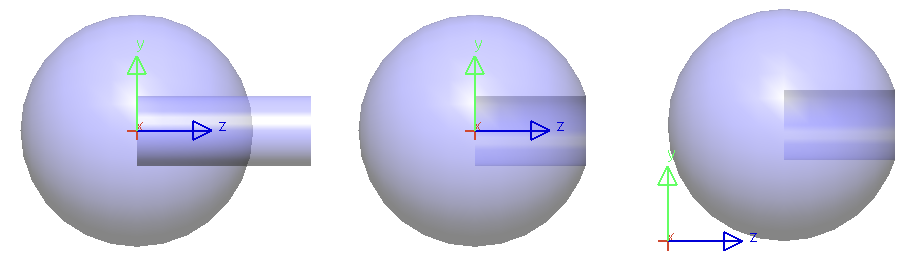

In [12]:
from IPython.display import Image
Image(filename = PATH + 'BooleanAndMove.PNG',width=500,height=100)

In [66]:
cmdstr="Cylinder " +lt0.Coord3(0,0,0) + " 3 15" #radius =3, length = 15
lt0.Cmd(cmdstr)
#Get the names of the objects. We have 2 objects
#Notice that we are using the "index" of each solid object
names=[]
for i in [1,2]:
    key="Solid[" + str(i) + "]"
    print("Current data key is: " + key) #so that we can see it
    names.append(lt0.DbGet(key, "Name"))
    print(names[i-1])

#Select two objects
lt0.Cmd("Select " + lt0.Str(names[0]) + " More " + lt0.Str(names[1]))
lt0.Cmd("Subtract")
#Resulting object has te name of the first selected object for boolean
lt0.Cmd("Select " + lt0.Str(names[0]))
lt0.Cmd("Move " + lt0.Coord3(0,10,10))

Current data key is: Solid[1]
Sphere_1
Current data key is: Solid[2]
Cylinder_19


0

# Access data in grids (1D and 2D)
- Access to data in grids is a slightly different process
- There are two types of data grids
    - 1D and 2D
- When accessing grid data, we need to use the two optional arguments in the DbGet() and DbSet() functions. Typically we omit these arguments for general data access

![Data Grids](img/GridData.PNG)

## Note that LTPython project, described later in this presentation provides more flexible data access methods. This is an illustration of barebone script code

# Here's an example of getting the spectral distribution from a receiver

Number of rows: 94


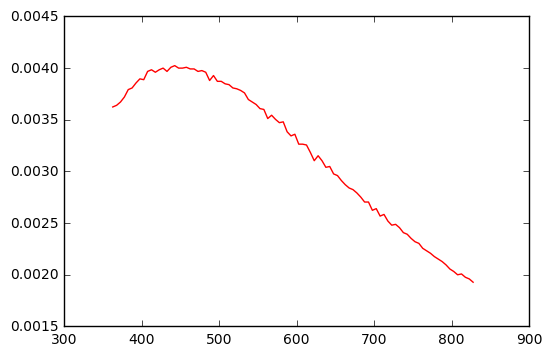

In [94]:
#Get the spectral power distribution from a receiver (1D grids)
key="receiver[1].spectral_distribution[1]"
cellcount=int(lt0.DbGet(key,"Count"))
print("Number of rows: " + str(cellcount))
w=np.zeros((cellcount))
p=np.zeros((cellcount))
for i in range(1,cellcount+1,1):
    w[i-1],stat=lt0.DbGet(key,"Wavelength_At",0,i,1) #data returned is a tuple!
    p[i-1],stat=lt0.DbGet(key,"Power_At",0,i,1)
    
plt.plot(w,p,'-r')

# Here's an example of getting mesh data from a receiver
- This example shows how to access individual cell values
- Typically, you can use the GetMeshData() function described later in this document to get the data for a given mesh in a single call

## Note that LTPython project, described later in this presentation provides more flexible data access methods. This is an illustration of barebone script code

(-4.0, 4.0, -4.0, 4.0)

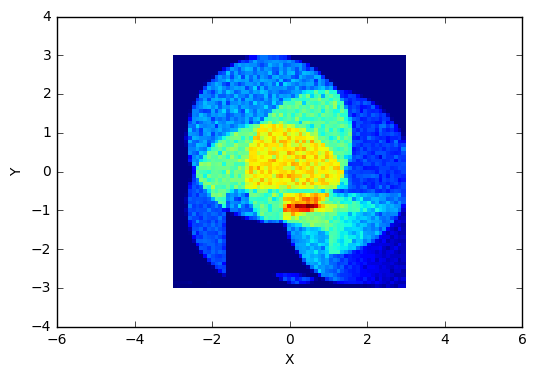

In [5]:
#Get the mesh data one cell at a time (this is a 2D grid)
# Note that a faster method for mesh data is described below
key="receiver[1].Mesh[1]"
xdim=int(lt0.DbGet(key,"X_Dimension")) #Columns
ydim=int(lt0.DbGet(key,"Y_Dimension")) #Rows
cv=np.zeros((ydim,xdim))
for i in range(1,xdim+1,1):
    for j in range(1,ydim+1):
        cv[j-1,i-1],stat=lt0.DbGet(key,"CellValue",0,i,j)

#Get the mesh bounds
MinX=lt0.DbGet(key,"Min_X_Bound")
MaxX=lt0.DbGet(key,"Max_X_Bound")
MinY=lt0.DbGet(key,"Min_Y_Bound")
MaxY=lt0.DbGet(key,"Max_Y_Bound")
#Create a data grid for plotting, and plot the data
xvec=np.linspace(MinX,MaxX,xdim+1)
yvec=np.linspace(MinY,MaxY,ydim+1)
X,Y=np.meshgrid(xvec,yvec)
plt.pcolormesh(X,Y,cv,cmap='jet')
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
#See below for a simpler/faster method to access mesh data

# Writing and calling functions
## This is a function to retrieve data from a receiver mesh
- Get the data from the entire mesh in one call, without having to iterate through each cell
- The function below also returns some other mesh parameters such as the dimensions and bounds
- Notice also that it includes help strings (known as Doc Strings)

In [7]:
def GetLTMeshParams(MeshKey,CellValueType):
    """Get the data from a receiver mesh.
    Parameters
    ----------
    MeshKey : String
        data access string for the receiver mesh
    CellValueType : data type to retrieve
    
    Returns
    -------
    X_Dimension
        Number of bins in X dimension
    Y_Dimension
        Number of bins in Y dimension
    Min_X_Bound
        Minimum X bound for the mesh
    Max_X_Bound
        Maximum X bound for the mesh
    Min_Y_Bound
        Minimum Y bound for the mesh
    Max_Y_Bound
        Maximum Y bound for the mesh
    Mesh_Data_Array
        An array of data, based on the cell value type requested
    
    Examples
    --------
        meshkey="receiver[1].Mesh[1]"    
        xdim,ydim,minx,maxx,miny,maxy,md=GetLTMeshParams(meshkey,"CellValue")
    """
    XDim=int(lt0.DbGet(MeshKey,"X_Dimension"))
    YDim=int(lt0.DbGet(MeshKey,"Y_Dimension"))
    MinX=lt0.DbGet(MeshKey,"Min_X_Bound")
    MaxX=lt0.DbGet(MeshKey,"Max_X_Bound")
    MinY=lt0.DbGet(MeshKey,"Min_Y_Bound")
    MaxY=lt0.DbGet(MeshKey,"Max_Y_Bound")
    # We need a double array to retrieve data
    dblArray=System.Array.CreateInstance(System.Double,XDim,YDim)
    [Stat,mData]=lt0.GetMeshData(MeshKey,dblArray,CellValueType)
    MeshData=np.ones((XDim,YDim))
    print(XDim,YDim)
    for i in range(0,XDim):
        for j in range(0,YDim):
            MeshData[i,j]=mData[i,j]
            #print(mData[i,j])
    MeshData=np.rot90(MeshData)
    #Notice how we return multiple data items
    return XDim,YDim,MinX,MaxX,MinY,MaxY,MeshData 


# Here's how we call the above function with arguments
- Get the data
- Create a 2D grids for x and y, uniformly spaced, for plotting
- Use 'pcolormesh()' for plotting
    - 'pcolormesh()' is faster than 'pcolor()'

61 61


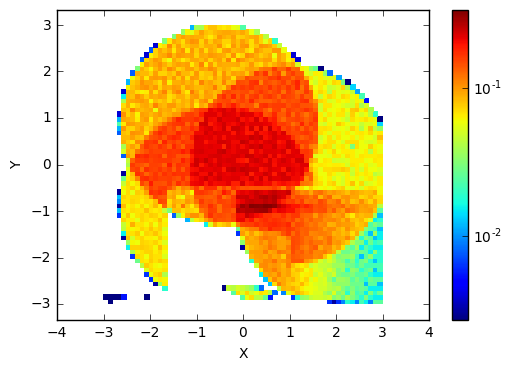

In [8]:
import matplotlib
meshkey="receiver[1].Mesh[1]"    
xdim,ydim,minx,maxx,miny,maxy,md=GetLTMeshParams(meshkey,"CellValue")
cellx=np.linspace(minx,maxx,xdim+1)
celly=np.linspace(miny,maxy,ydim+1)
X,Y=np.meshgrid(cellx,celly)
#Raster chart in LOG scale
plt.pcolormesh(X,Y,np.flipud(md),cmap="jet",norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.axis("equal")
plt.xlabel("X")
plt.ylabel("Y")

# Accessing JumpStart Functions
- JumpStart library is a set of helper functions available for macro users
    - These functions attempt to simplify the syntax/usage so that you can write macros faster!
- LTCOM64 includes all JumpStart functions
    - This means you can access both LightTools API (that we looked at so far) and JumpStart functions using a single reference library
- The example below shows how to create a handle to JumpStart functions

In [5]:
from LTCOM64 import JSNET2
js=JSNET2()
#If PID capabilities (for multiple LightTools sessions) needed, use the PID for the session you want
#js.LTPID=12040
js.UpdateLTPointer

<bound method 'UpdateLTPointer'>

# After creating the handle, you can use all the available functions
- For details on these functions, please refer to Help>Document Library>API Reference Guide
    - Most JumpStart functions support wild card (*) capability
        - i.e. you can perform a given operation across multiple objects simultaneously
- Example below shows how to create a sphere and move it to a specific location, using JumpStart functions

In [10]:
js.MakeSphere(5,"mySphere")
js.MoveVector("mySphere",0,10,10)
# js.MoveVector("mys*",0,10,10) will move all objects whose name starts with 'mys'

0

# Creating a simple model for a parameter study
- Make a block, set positon/orientation
- Change one surface to a "Smooth/specular Mirror"
- Add a single NSRay
- Add a dummy plane to capture the reflected ray


In [3]:
#First, let's create a simple function to add a new optical property
#This will create a new property, and return the name 
def AddNewProperty(propname):
    lt0.Cmd("\O" + lt0.Str("PROPERTY_MANAGER[1]"))
    lt0.Cmd("AddNew=")
    lt0.Cmd("\Q")
    lt0.DbSet("Property[@Last]", "Name", propname)
    return 0

op="myMirror"
AddNewProperty(op)
key="PROPERTY[" + op + "]"
lt0.DbSet(key,"Simple Type","Mirror")

0

# Add the mirror, set the optical property and orientation

In [6]:
mirrorname="myMirror"
js.MakeTube(0.25,10,10,"R",mirrorname)
key="SOLID[@Last].SURFACE[LeftSurface].ZONE[1]"
lt0.DbSet(key,"PropertyName",op)
#Set the orientation, Alpha=45
key="Solid[@Last]"
lt0.DbSet(key,"Alpha",-45)

0

# Add the dummy and NSRay

In [7]:
#Add a NSRay
lt0.Cmd("NSRayAim xyz 0,10,0 xyz 0,0,0")
#Add a dummy plane
lt0.Cmd("DummyPlane xyz 0,0,-20 xyz 0,0,-40")

0

# Now we are ready to change mirror and get the ray data

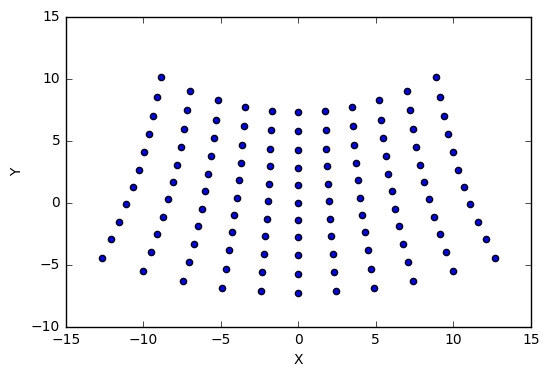

In [8]:
key="Solid[1]"
segkey="NS_RAY[@Last].NS_SEGMENT[segment_2]"
numpts=11
datax=np.zeros((numpts,numpts))
datay=np.zeros((numpts,numpts))
alpha=np.linspace(-55,-35,11)
beta=np.linspace(-20,20,numpts)
for i in range(0,numpts,1):
    lt0.DbSet(key,"Alpha",float(alpha[i]))
    for j in range(0,11,1):
        lt0.DbSet(key,"Beta",float(beta[j]))
        datax[i,j]=lt0.DbGet(segkey,"Local_Surface_X")
        datay[i,j]=lt0.DbGet(segkey,"Local_Surface_Y")

plt.scatter(datax,datay)
plt.xlabel('X')
plt.ylabel('Y')

# How to use optimization algorithms from 'scipy'
- Use of 'minimize' function
- There are three key parts to setup an optimization problem
    - Initiate the minimize function
        - Use initial variable data
        - call the objective function
    - Apply variable values generated by the minimize to LightTools model
    - Evaluate the metrit function, return the merit function value
    

# Import minimize from scipy library
- We still need the libraries mentioned above in order to connect to LightTools, etc.
- Import the LTCOM64 library and create a connection to the running LightTools session

In [9]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import clr
#Initiate the connection with LightTools
clr.AddReference("C:\\Program Files\\Optical Research Associates\\LightTools 8.4.0\\Utilities.NET\\LTCOM64.dll")
from LTCOM64 import LTAPIx
lt0=LTAPIx()
lt0.UpdateLTPointer

<bound method 'UpdateLTPointer'>

# Our objective function, called by the minimize, should use the parameters sent from the minimize function
- Update variables
- Evaluate the merit function
- Return the merit function value

# First, a separate function to evaluate the merit function

In [10]:
def EvalMF():
    lt0.Cmd("\O" + lt0.Str("OPT_MERITFUNCTIONS[1]"))
    lt0.Cmd("EvaluateAll=")
    lt0.Cmd("\Q")
    return 0

# Another function to apply variable values
- Note that we do not skip disabled variables!

In [11]:
def setVarVals(v):
    v=np.asarray(v)
    vlist=lt0.DbList('Lens_Manager[1]','Opt_DBVariable')
    vcount=lt0.ListSize(vlist)
    lt0.SetOption('DbUpdate',0)
    for i in range(1,vcount+1):
        vkey=lt0.ListAtPos(vlist,i)
        lt0.DbSet(vkey,'CurrentValue',float(v[i-1]))
        print('Variable Value: ' + str(v[i-1]))
    lt0.SetOption('DbUpdate',1)
    lt0.ListDelete(vlist)

# Now we can create the objective function
- 'vardata' is what we get from minimize function
    - for example, if we setup 3 variables, we will get 3 values

In [12]:
def ApplyVarsReturnMF(vardata):
    myd=np.asarray(vardata)
    setVarVals(myd)
    EvalMF()
    mfv=lt0.DbGet('OPT_MERITFUNCTIONS[1]','CurrentValue')
    print("MF Value: " + str(mfv))
    print('****')
    return mfv

# Finally, we call the minimize function with arguments
 - We need to pass the initial variable values to the minimize
 - For convenience, we can read the values from LightTools rather than hard coding
     - Make sure to save the original values since we will modify them during optimization

In [ ]:
# Here's a sample list of optimization algorithms we can try
# Some of these algorithms require 'jac', which is the Jacobian (gradiant), and it's not shown here
# The Nelder-Mead is the best option to try first, given its simplicity
optengines=['Nelder-Mead','BFGS','powell','Newton-CG','SLSQP','TNC']
vlist=lt0.DbList('Lens_Manager[1]','Opt_DBVariable')
vcount=int(lt0.ListSize(vlist))
lt0.ListDelete(vlist)
v0=np.zeros((vcount))
for i in range(1,vcount+1):
    v0[i-1]=lt0.DbGet('OPT_DBVARIABLE[' +str(i) +']','CurrentValue')

# Note that 'maxiter' should be small (e.g. 5) for other algorithms, except 'Nelder-Mead'
res=minimize(ApplyVarsReturnMF,v0,method=optengines[0],options={'disp': True,'maxiter':50})   

# Simple optimization example
- Open 'Simple2VarOpt.1.lts'
- X and Y coordinates of the NSRay are variables
- Merit function is defined for X=0, Y=0 (local intersection coordinates on dummy plane)
    - When optimized, the ray should be placed at the origin of the dummy plane

![title](img/Simple2VarOpt.PNG)

# Run the above code blocks in the sequential order to see the optimization process
- Results will be printed below the last code block, where we invke the minimize function
# Repeat the optimization for the following models
- BezierSweptOpt.1.lts
    - Collimate a fan of rays using a collimator built with Swept geometry
    - The second profile of the Swept is 'Bezier', and we try to optimize Bezier parameters
- Simple2VarOpt_Lens.1.lts
    - Focus a ray fan using a conic lens
    - The curvature and the conic constant are the variables
- RayGrid_SplinePatch.1.lts
    - Start with a flat mirror, created with a splinepatch lens surface
    - Collimate the ray grid (i.e. perpendicular to the dummy plane)
    - This is a 9-variable problem and Nelder-Mead will require many iterations
        - Try 'powell' (or optengines[2])
        - <font color='red'>res=minimize(ApplyVarsReturnMF,v0, **method=optengines[2]** ,options={'disp': True, **'maxiter':5**})</font>



In [ ]:
res=minimize(ApplyVarsReturnMF,v0,method=optengines[2],options={'disp': True,'maxiter':5})

# Sample Library Project ("LTPython")
- This is a library of supporting functions that enable you to write macros more efficiently
- Shown below are few examples. Refer to the following section on using Spyder, in order to see how to utilize the function library in your scripts
- In order to run the following examples, you must have the two modules (LTData.py, LTUtilities.py) in your work directory. Work directory is shown in the notebook kernel, as shown below

![Working Directory](img/KernelWorkDir.PNG)

- Note that the *.ipynb file is the jupyter notebook file we are using here

![Code Modules](img/ModulesForjnb.PNG)


## Several data get/set examples
- Note that the full data access string, via Copy Data Access Name, can be passed to these functions

In [6]:
#Import the module and update the LT pointer
import LTData as ltd
ltd.lt0=lt0 #update the pointer

In [9]:
#Now you can get/set the data items like this
R = ltd.GetLTDbItem('Solid[1].Primitive[1].radius')
print('Radius is: ' + str(R))
ltd.SetLTDbItem('solid[1].primitive[1].radius',15)
illum=ltd.GetLTGridItem('receiver[1].mesh[1].CellValue_UI',45,45) #Accessing a 2D grid
print('Value is: ' + str(illum))
wave=ltd.GetLTGridItem('RECEIVER[1].SPECTRAL_DISTRIBUTION[1].Wavelength_At',5) #Accessing a 1D grid
print('Wavelength is: ' + str(wave))
#Make sure there's a valid spectral region with at least 1 row for the following code!
stat=ltd.SetLTGridItem('spectral_region[1].WavelengthAt',600,1) #Setting data in a 1D grid

Radius is: 15.0
Value is: 0.2308494059975981
Wavelength is: 452.5


## Several examples of getting and plotting receiver mesh and spectral data

91 91


0

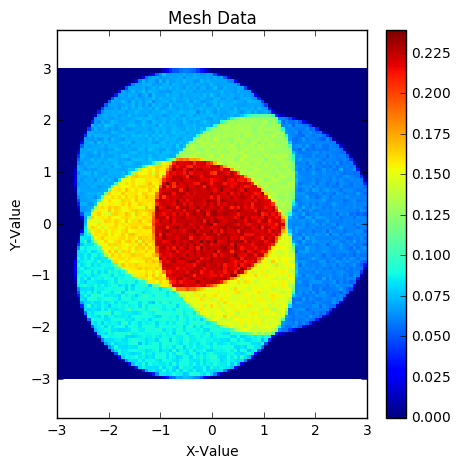

In [10]:
#First, import standard libraries we need for arrays/plotting
import matplotlib.pyplot as plt # general plotting
import numpy as np #additional support for arrays, etc.

#Plot a mesh
ltd.PlotRaster('receiver[1].mesh[1]','cellvalue',colormap='jet',
               xlabel='X-Value',ylabel='Y-Value',title='Mesh Data',plotsize=(5,5),plottype='2D')

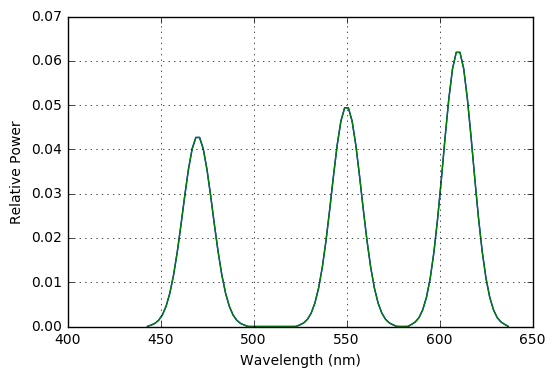

In [9]:
#Plot the spectral distribution
numrows,spd=ltd.PlotSpectralDistribution('receiver[1].spectral_distribution[1]',returndata=True)
plt.plot(spd[:,0],spd[:,1])

91 91
91 91
91 91


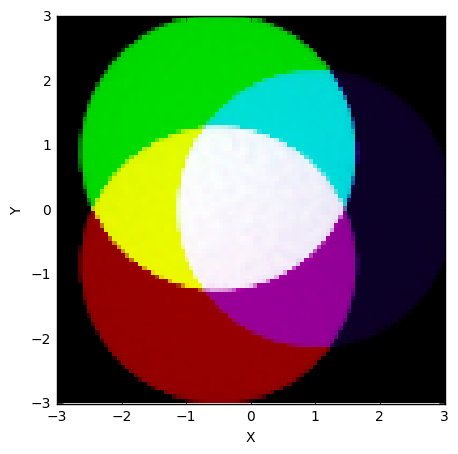

In [11]:
#Plot true color data. Note the index=2 for the CIE mesh
r,g,b=ltd.PlotTrueColorRster('receiver[1].mesh[2]',plotsize=(5,5),returndata=True)

# Examples of capturing screenshots

In [5]:
#We need to save the screenshot as an image file in the work directory
#LTUtilities module handles the work directory and file IO
import LTUtilities as ltu 
ltu.lt0=lt0
ltd.ltu=ltu
#check the workdir
wd=ltu.checkpyWorkDir()
print(ltu.workdirstr) # this is where image files are saved

C:/Users/mali/Documents/LTUser/
C:/Users/mali/Documents/LTUser/pyWorkDir


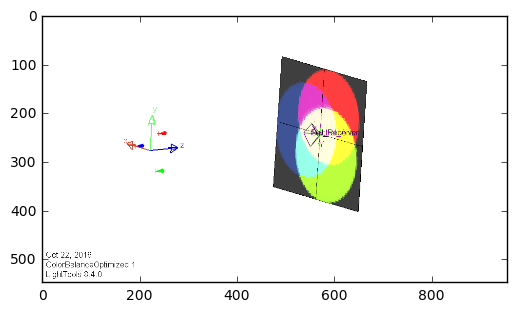

In [13]:
#Get a screenshot of the 3D View
viewname='3d'
im,imname=ltd.GetViewImage(viewname)
plt.imshow(im)

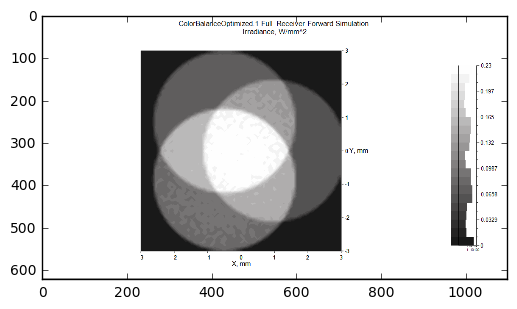

In [15]:
#Get a screenshot of an open chart view
#Usually, V3D is the first view. The '3' below indicates the second chart view currently open
viewname='3'
im,imname=ltd.GetViewImage(viewname)
plt.imshow(im)

## Access to ray path data
- Consider the following system, where three sources are used to illuminate a dummy plane
    - Assume we want to see ray paths going through the cylinder object

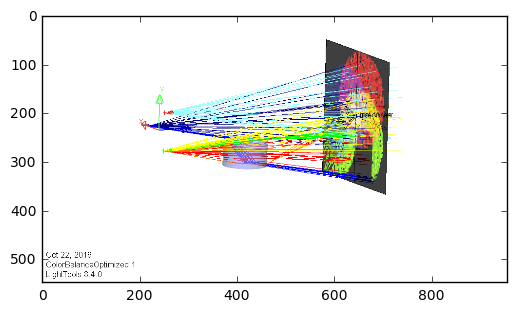

In [16]:
#Let's get a screenshot of the full system
viewname='1'
im,imname=ltd.GetViewImage(viewname)
plt.imshow(im)

## Now we can get the ray path strings, and turn on only the paths that involve the cylinder object

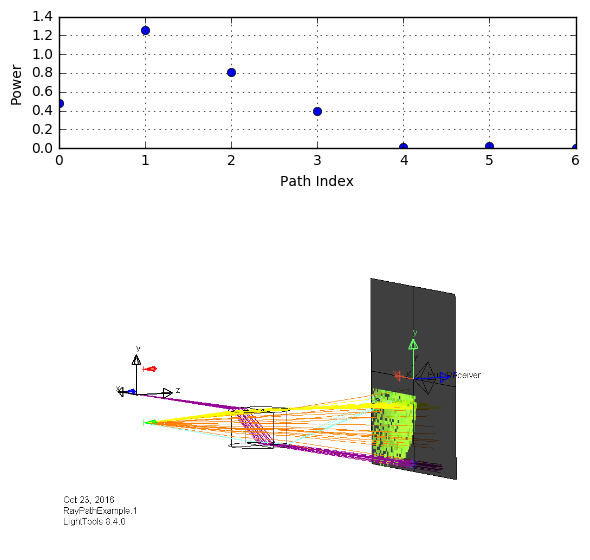

In [7]:
#Ray path data
key='receiver[1]'
#First, let's hide all ray paths
lt0.Cmd('\O"RECEIVER[1].FORWARD_SIM_FUNCTION[1]" HideAll= \Q') 
#Now get the ray path data, and show only the matchine paths
va,pa,ra,st=ltd.GetRayPathData(key,usevisibleonly=False)

# Two subplots, different size
from matplotlib import gridspec
fig = plt.figure(figsize=(6, 6)) 
gs = gridspec.GridSpec(2,1, height_ratios=[1,3]) 
ax1 = plt.subplot(gs[0])
ax1.plot(pa,'o')
ax1.set_xlabel('Path Index')
ax1.set_ylabel('Power')
ax1.grid(True)

s2='cylin' #this is the string we're searching for
for i in range(0,len(st)):
    #print(st[i])
    s1=st[i].lower()
    if s2 in s1:
        #print(str(i) + ';' + st[i])
        ltd.SetLTGridItem(key + '.forward_sim_function[1].RayPathVisibleAt','yes',(i+1))

#Finally, let's get another screenshot to show the results
viewname='1'
im,imname=ltd.GetViewImage(viewname)
ax2 = plt.subplot(gs[1])
ax2.imshow(im)
ax2.axis('off')
plt.tight_layout()


## Get receiver ray data that match the selected ray paths

Qualified number of rays: 1448


(-0.5, 3.0, -3.0, -0.5)

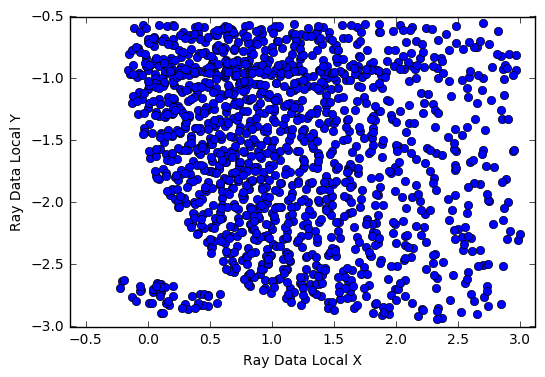

In [31]:
#receiver ray data
des=['raydatax','raydatay','raydataz']
reckey='receiver[1]'
simtype='Forward_Sim_Function[1]'
#Note here that we specify the following function to 
# use passfilters flag
N,M,raydata=ltd.GetLTReceiverRays(reckey,des,usepassfilters=True)
plt.plot(raydata[:,0],raydata[:,1],'o')
plt.xlabel('Ray Data Local X')
plt.ylabel('Ray Data Local Y')
plt.axis('equal')

## Receiver rays based on Ray Ordinal Number
- Every ray starts with an ordinal number, based on the ray sequence (1, 2, 3, etc.)
- Diring ray trace, ordinal number does not change
- Ordinal number can be used as a unique identifier when filtering ray data on receivers

## Consider the following ray paths through a lens

![Ray Paths](img/RayFootprints.PNG)

## One can isolate the ray paths using ray path analyzer or a macro approach discussed above
## However, in this particular case, we want to obtan the ray intersection points on the lens surface
- A receiver on the lens surface can give the ray intersection points for all rays, not just the ray path shown

## If the ray ordinal numbers on the receiver attached to the dummy plane are known, then we can match those ray ordinal numbers to the subset of rays on the receiver attached to the lens surface
## The simplest way to visualize ray intersection points as a point cloud is to generate a ray data source using the subset of rays, and importing that ray source using the local coordinate system on the lens surface

In [6]:
#Assume default data, x, y, z, l, m, n, p
simdata='forward_sim_function[1]'
reckey1='receiver[1]' #receiver on the lens surface
reckey2='receiver[2]' #receiver on the dummy plane
n,rayfname=ltd.MakeRayFileUsingRayOrdinal(reckey1,DataAccessKey_Ordinal=reckey2)

Qualified number of rays: 90
Using temporary file name: C:/Users/mali/Documents/LTUser/pyWorkDir/1mi8clam.txt


## Import the resulting ray source using the local coordinate system on the lens surface

- RaySource "C:/.../pyWorkDir/1mi8clam.txt" LXYZ 0,0,0 LXYZ 0,0,1 LXYZ 0,1,0

### Note: rename the ray source with a meaningful name. The default name used is random
## After the ray source is loaded into the model, intersection points can be visualized as a point cloud in the 3D model

![Ray Footprints](img/RayPointCloud.PNG)

# Extra ray data for receiver filters
- This data is not directly available with LTAPI4.GetMeshData()
- Only way to access this data is the use DbGet() function for each ray
- This means the process will be slower when there's a large number of rays on the receiver

## Following example shows how to access optical path length for each ray
- Optical Path Length filter is required on the receiver

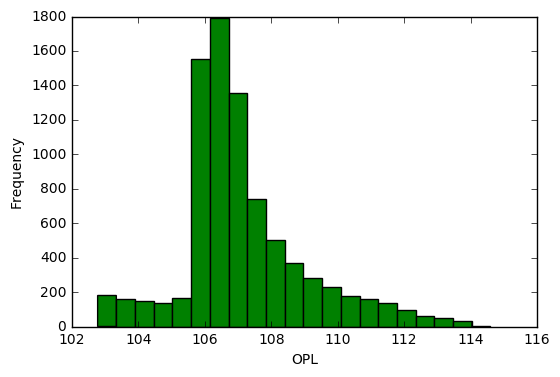

In [8]:
#Extra ray data, OPL
reckey='receiver[1]'
#Notice that the second argument is an Enum (integer) for the filter type
N,exdata=ltd.GetLTReceiverRays_Extra(reckey,ltd.ExtraRayData.Optical_Path_Length.value)
plt.hist(exdata,bins=21,color='green')
plt.xlabel('OPL')
plt.ylabel('Frequency')

# Running Spyder

## Spyder provides a more versatile code environment with debug capabilities. For regular macro development work, this is the best environment

### Typical Spyder environment will appear like this

![Spyder IDE](img/SpyderENV.PNG)

## How to load the test project into Spyder
1. Unzip the supplied LTPython.zip to your current working directory
    - This is usually C:/Users/YourUserName/
2. Run Spyder

![Run Spyder](img/RunSpyder.PNG)

3. Go to Project>Open Project. 

![Open Project](img/OpenProject.PNG)

## Project files will appear like this

![Project Tree](img/ProjectTree.PNG)

## Test code to test most of the available functions are in "TestLTDataFunctions.py"

### Most of the code is commented out. Make sure to uncomment the portions you like to try

### Watch the attached video clip to see few examples

## These are the different modules
- LTData
    - This includes a set of functions to get/set database items, grid items, receiver data, ray path data, etc.
- LTUtilities
    - This module contains some general purpose utilities, used by LTData and other modules
- LTProperties
    - This is a special module to illustrate how to use JumpStart Optical Property functions
    - Notice that this module still uses COM. We will fix this issue. For now, this is the only way to access these JumpStart functions (fairly new to the JS library)
    - This module only contains "test code" that illustrates how to use the base functions in JS library
- LTOpt
    - Few optimization examples. Use the attached test models for these examples
    
# Ignore other modules

# How to use win32COM client to connect to LightTools
### Note that this is not a recommended method due to possible compatibility issues in the future!

In [ ]:
import win32com.client
import numpy as np
import matplotlib.pyplot as plt
#DbGet() and Mesh data example
lt = win32com.client.Dispatch("LightTools.LTAPI4")
XD=int(lt.DbGet(MeshKey,"X_Dimension"))
YD=int(lt.DbGet(MeshKey,"Y_Dimension"))
k=np.ones((XD,YD))
#The CellFilter may not work for all options in COM mode
[stat,myd,f]=lt.GetMeshData("receiver[1].Mesh[1]",list(k),"CellValue")
g=np.asarray(myd)
g=np.rot90(g)
x = np.linspace(-3, 3, XD)
y = np.linspace(-3, 3, XD)
X,Y = np.meshgrid(x, y)
plt.pcolor(X,Y,g)
plt.pcolormesh(X,Y,g,cmap="gray")
plt.xlabel("X")
plt.ylabel("Y")

#JumpStart library
js = win32com.client.Dispatch("LTCOM64.JSML")
js.MakeSphere(lt,5,"mySphere")
js.MoveVector(lt,"mySphere",0,10,10)
# js.MoveVector(lt,"mys*",0,10,10) will move all objects whose name starts with 'mys'